### Machine Learning Lab06 Exercise: LDA-based Handwritten Number Recognition

### Exercise 1 Linear Discriminant Analysis from Scratch using numpy (50 points )
- <font size=4> Complete the missing code in the LDA class below<font>

In [88]:
import numpy as np
import matplotlib.pyplot as plt


class LDA:
    # n_components:Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.eigenvalues = None
        self.eigenvectors = None

    def fit(self, X, y):
        if self.n_components is None or self.n_components > X.shape[1]:
            n_components = X.shape[1]
        else:
            n_components = self.n_components

        n_features = np.shape(X)[1]
        labels = np.unique(y)

        u_k = np.array([np.mean(X[y == label], axis=0) for label in labels])

        # Calculate within-class scatter matrix S_W
        S_W = np.zeros((n_features, n_features))
        for label in labels:
            class_data = X[y == label]
            diff = class_data - u_k[label]
            for dif in diff:
                S_W += np.outer(dif,dif)

        # Calculate between-class scatter matrix S_B
        u = np.mean(X, axis=0)
        S_B = np.zeros((n_features, n_features))
        for label in labels:
            n = class_data.shape[0]
            diff = u_k[label] - u
            for dif in diff:
                S_B += np.outer(dif,dif)

        # Calculate SW^-1 * SB
        S_W_inv = np.linalg.inv(S_W)
        SW_SB = np.dot(S_W_inv, S_B)

        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(SW_SB)

        # Sort the eigenvalues and corresponding eigenvectors
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = eigenvectors[:, idx][:, :n_components]

        self.eigenvalues = eigenvalues
        self.eigenvectors = eigenvectors

    def fit_transform(self, X):
        if self.eigenvectors is not None:
            return X @ self.eigenvectors
        else:
            raise ValueError("You must call fit() before fit_transform()")

    def transform(self, X):
        if self.eigenvectors is not None:
            return X @ self.eigenvectors
        else:
            raise ValueError("You must call fit() before transform()")

- <font size=4> Dimensionality reduction visualization<font>

d:\Anaconda3\envs\CS329\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
d:\Anaconda3\envs\CS329\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\gutao\AppData\Local\Temp\ipykernel_233280\2010495300.py:32: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
C:\Users\gutao\AppData\Local\Temp\ipykernel_233280\2010495300.py:33: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
C:\Users\gutao\AppData\Local\Temp\ipykernel_233280\2010495300.py:34: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will

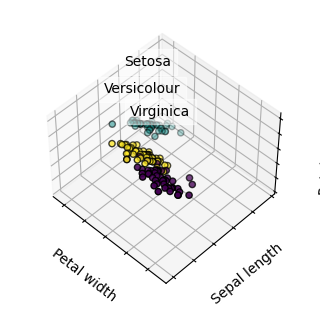

In [89]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

np.random.seed(5)


iris = datasets.load_iris()
X = iris.data
y = iris.target
pca = LDA(n_components=3)
pca.fit(X, y)
X = pca.transform(X)

fig = plt.figure(1, figsize=(4, 3))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:    
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, 
        edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
# ax.set_title("Ground Truth")
ax.dist = 12

plt.show()

### Exercise 2 Recognize handwritten numbers with LDA (50 points ). 

Your task in this section is to recognize handwritten numbers, and you can use the linear discriminant analysis model from the Scikit-Learn library to fit, evaluate, and predict them.

<font color='red' size=4>Note that your accuracy in this section will directly determine your score.</font>

### Loading the MNIST Dataset


In [90]:
########### Write Your Code Here ###########
import gzip
import numpy as np


# Define a function to load MNIST data
def load_mnist_images(filename):
    with gzip.open(filename, "rb") as file:
        data = np.frombuffer(file.read(), np.uint8, offset=16)
    return data.reshape(-1, 28, 28)


def load_mnist_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = np.frombuffer(file.read(), np.uint8, offset=8)
    return data


# Load the training and test data
X_train = load_mnist_images("./MNIST_dataset/train-images-idx3-ubyte.gz")
y_train = load_mnist_labels("./MNIST_dataset/train-labels-idx1-ubyte.gz")
X_test = load_mnist_images("./MNIST_dataset/t10k-images-idx3-ubyte.gz")
y_test= load_mnist_labels("./MNIST_dataset/t10k-labels-idx1-ubyte.gz")

############################################

###  Visualization of MINIST

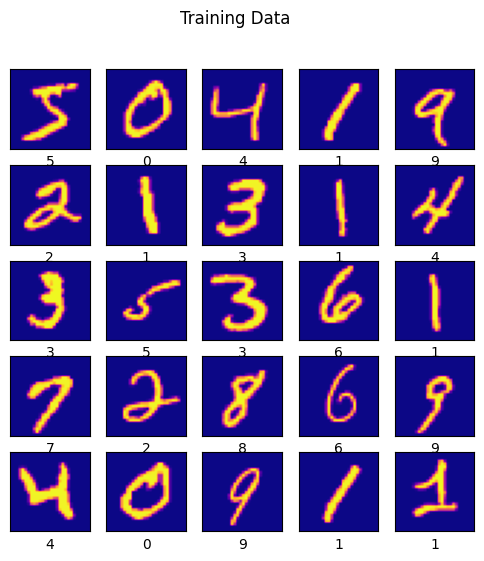

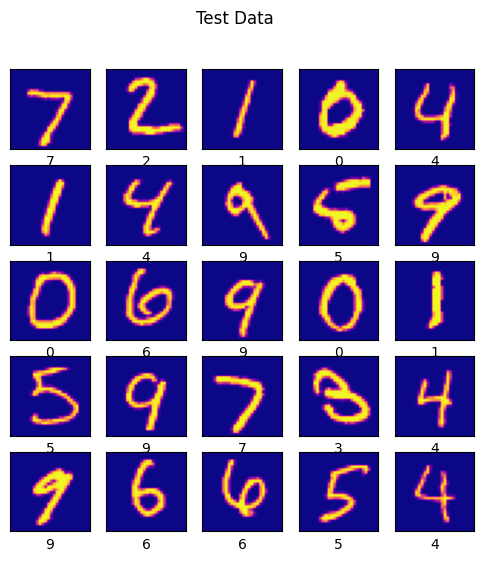

In [91]:
# Visualize MINIST
########### Write Your Code Here ###########
import matplotlib.pyplot as plt

def visualize_MNIST(features, labels, title):
    plt.figure(figsize=(6, 6))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(features[i], cmap='plasma')
        plt.xlabel(str(labels[i]))
    plt.suptitle(title)
    plt.show()

# Plot a random sample of training images and their labels
visualize_MNIST(X_train, y_train, title="Training Data")

# Plot a random sample of test images and their labels
visualize_MNIST(X_test, y_test, title="Test Data")

############################################

### Fit  Model

In [92]:
########### Write Your Code Here ###########
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train_ = X_train.reshape(X_train.shape[0], -1)
y_train_ = y_train.reshape(y_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0],-1)
y_test = y_test.reshape(y_test.shape[0], -1)

lda = LinearDiscriminantAnalysis(solver='lsqr',shrinkage=0.15)

X_train_l, X_val, y_train_l, y_val = train_test_split(X_train_, y_train_, test_size=0.2, random_state=42)

lda.fit(X_train_l, y_train_l)

y_val_pred = lda.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

y_pred = lda.predict(X_test)

############################################

d:\Anaconda3\envs\CS329\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Validation Accuracy: 87.39%


## Evaluate model

LDA Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       980
           1       0.89      0.96      0.92      1135
           2       0.92      0.80      0.86      1032
           3       0.87      0.87      0.87      1010
           4       0.85      0.91      0.88       982
           5       0.84      0.81      0.82       892
           6       0.91      0.91      0.91       958
           7       0.92      0.84      0.88      1028
           8       0.81      0.82      0.81       974
           9       0.82      0.88      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Matrix:
[[ 931    1    2    2    2   17   12    1   10    2]
 [   0 1093    2    3    1    3    5    0   28    0]
 [  14   33  829   27   23    5   25   11   56    9]
 [   4    6   27  883    2   29    4

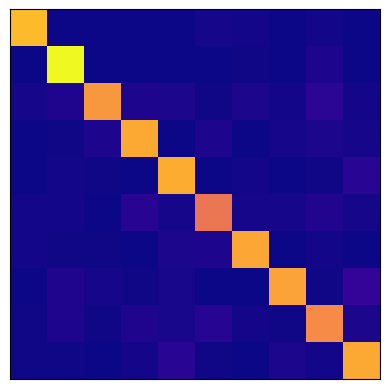

In [93]:
########### Write Your Code Here ###########
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

report = classification_report(y_test, y_pred)
print("LDA Classification Report:\n", report)

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(confusion, cmap="plasma")
plt.show()

############################################

### Exercise 3: Questions
- Q1:What are the advantages and disadvantages of LDA?

特征降维：LDA非常适合在保持类别可分性的同时降低数据维度。它将数据投影到一个维度较低的空间，其中类别之间有很好的分离，可以提高后续分类算法的效率。

可解释性：LDA提供了每个输入特征的系数（载荷），这有助于理解每个特征在分离类别中的重要性。

减少过拟合：LDA通过将数据投影到低维空间来减少过拟合。这在处理高维数据集时特别有用。

分类：LDA可用于分类任务。它找到分离不同类别的线性决策边界，是一种简单而有效的分类方法。

不适用于不平衡数据：LDA可能不适用于一些类别的样本远远少于其他类别的不平衡数据集。这可能导致偏向性的投影。

维数灾难：当特征的数量远远大于样本数量时，LDA可能对“维数灾难”敏感。在这种情况下，正则化或其他降维技术可能更合适。

信息丢失：LDA将数据投影到低维空间，可能导致信息的一些丢失。信息丢失的程度取决于选择的维数。

- Q2 LDA can be used for dimensionality reduction, so can PCA. Please tell the difference between them?

线性判别分析有监督学习，主成分分析无监督学习

线性判别分析的目标是找到最好地区分不同类别的特征的线性组合。

主成分分析的目标是找到数据变化最大的正交轴（主成分），而不考虑类别标签。
